## Data Diagnose
- Missing data
- Outliers
- Duplicate rows
- Need to process columns

In [4]:
import os
from pathlib import Path

In [5]:
# set root directory
path_root = Path("C:/Users/giann/data-science-core")
os.chdir(path_root)
print(f'- Root directory = {os.getcwd()}')

In [7]:
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils

In [8]:
# set root directory
utils.set_root()
utils.download_dataset('http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip')

- root directory = C:\Users\giann\data-science-core
- root directory = C:\Users\giann\data-science-core
- directory  C:\Users\giann\data-science-core\dataset\bike-sharing-dataset  already exists
- downloading file... Done!
- content in folder: bike-sharing-dataset
- list of files : ['day.csv', 'hour.csv', 'Readme.txt']


In [9]:
# import dataset
path_dataset = path_root / 'dataset/bike-sharing-dataset/day.csv'
data  = pd.read_csv(path_dataset)
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
# drop column
_ = data.drop(labels=['instant'], axis='columns', inplace = True, errors='raise')

### Data Exploration

In [11]:
# check nan per column and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [12]:
# check eligible categorical variable
data['season'].value_counts(dropna = False)

3    188
2    184
1    181
4    178
Name: season, dtype: int64

### Tailor data type attributes

In [13]:
# convert attributes to categorical type
categorical_attr = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
data[categorical_attr] = data[categorical_attr].apply(lambda x : x.astype('category'))

In [14]:
# Summary Statistic only numeri values
data.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Check ourliers
- Not all outliers are bad data points
- Some can be an error, but others are valid values

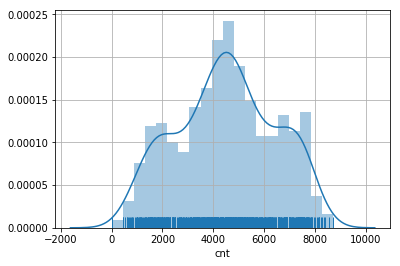

In [15]:
sns.distplot(data['cnt'], bins=20, kde = True, rug=True);
plt.grid()
plt.show()

### Check duplicates 

In [18]:
print(f"Number of duplicates = {data.duplicated().sum()}")

Number of duplicates = 0
